## Insight 4
### Desde una perspectiva demográfica ¿cuáles son las características que tienen un mayor impacto en el índice de letalidad de un país?

### Importamos librerías

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Importamos los datos 

In [9]:
df_covid_limpio = pd.read_csv('covid_clean.csv', sep=';')
df_population_limpio = pd.read_csv('population_clean.csv', sep=';')

### Verificamos las estructuras de datos

In [4]:
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48902 entries, 0 to 48901
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      48902 non-null  object 
 1   Country_code       48902 non-null  object 
 2   Country            48902 non-null  object 
 3   New_cases          48902 non-null  int64  
 4   Cumulative_cases   48902 non-null  int64  
 5   New_deaths         48902 non-null  int64  
 6   Cumulative_deaths  48902 non-null  int64  
 7   lethality_rate     48902 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 3.0+ MB


Convertimos Date_reported a DateTime

In [5]:
df_covid_limpio['Date_reported'] = pd.to_datetime(df_covid_limpio['Date_reported'])
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48902 entries, 0 to 48901
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      48902 non-null  datetime64[ns]
 1   Country_code       48902 non-null  object        
 2   Country            48902 non-null  object        
 3   New_cases          48902 non-null  int64         
 4   Cumulative_cases   48902 non-null  int64         
 5   New_deaths         48902 non-null  int64         
 6   Cumulative_deaths  48902 non-null  int64         
 7   lethality_rate     48902 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 3.0+ MB


### Filtramos registros hasta la fecha 31/12/2020 inclusive

In [6]:
rango = df_covid_limpio['Date_reported'] <= "2020-12-31"
df_filtrado = df_covid_limpio[rango].copy()

### Agrupamos por país y calculamos la media de la tasa de mortalidad (por país)

In [7]:
df_agrupado = df_filtrado.groupby(['Country_code', 'Country'], as_index=False).agg({'lethality_rate': 'mean'}).rename(columns={'lethality_rate': 'lethality_rate_mean'})
df_agrupado

,Country_code,Country,lethality_rate_mean
0,AD,Andorra,3.097271
1,AE,United Arab Emirates,0.450758
2,AF,Afghanistan,2.462106
3,AG,Antigua and Barbuda,3.734753
4,AI,Anguilla,0.000000
...,...,...,...
228,YE,Yemen,0.000000
229,YT,Mayotte,0.872976
230,ZA,South Africa,1.899765
231,ZM,Zambia,2.055205


### Hacemos un innerjoin entre df_agrupado y df_population_limpio

In [10]:
df_final = pd.merge(df_agrupado, df_population_limpio, on="Country_code", how="inner")
df_final

,Country_code,Country,lethality_rate_mean,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
0,AD,Andorra,3.097271,76000,39000,38000,162,83
1,AE,United Arab Emirates,0.450758,9212000,6444000,2768000,130,80
2,AF,Afghanistan,2.462106,37769000,19090000,18679000,58,64
3,AG,Antigua and Barbuda,3.734753,92000,44000,48000,209,79
4,AI,Anguilla,0.000000,15000,8000,8000,175,77
...,...,...,...,...,...,...,...,...
226,YE,Yemen,0.000000,31547000,15954000,15593000,60,65
227,YT,Mayotte,0.872976,294000,140000,155000,785,77
228,ZA,South Africa,1.899765,58087000,28208000,29879000,48,66
229,ZM,Zambia,2.055205,18380000,9066000,9314000,25,63


In [11]:
df_final.drop(columns=['Country_code', 'Country'], inplace=True)
df_final

,lethality_rate_mean,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
0,3.097271,76000,39000,38000,162,83
1,0.450758,9212000,6444000,2768000,130,80
2,2.462106,37769000,19090000,18679000,58,64
3,3.734753,92000,44000,48000,209,79
4,0.000000,15000,8000,8000,175,77
...,...,...,...,...,...,...
226,0.000000,31547000,15954000,15593000,60,65
227,0.872976,294000,140000,155000,785,77
228,1.899765,58087000,28208000,29879000,48,66
229,2.055205,18380000,9066000,9314000,25,63


### Feature Importances

In [12]:
x = df_final.drop(['lethality_rate_mean'], axis=1)
y = df_final['lethality_rate_mean']

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
model = RandomForestRegressor()
model.fit(x, y)

RandomForestRegressor()

In [15]:
model.feature_importances_

array([0.14161768, 0.14668502, 0.23403222, 0.26247485, 0.21519024])

In [16]:
feature_importances = pd.Series(model.feature_importances_, index=x.columns).sort_values(ascending=False)
feature_importances

Population_Density    0.262475
Female_Population     0.234032
Life_Expectancy       0.215190
Male_Population       0.146685
Total_Population      0.141618
dtype: float64

In [17]:
ft_imp_barvalues = feature_importances.copy()
for item in ft_imp_barvalues:
  ft_imp_barvalues = ft_imp_barvalues.replace(item, round(item*100,2))
ft_imp_barvalues

Population_Density    26.25
Female_Population     23.40
Life_Expectancy       21.52
Male_Population       14.67
Total_Population      14.16
dtype: float64

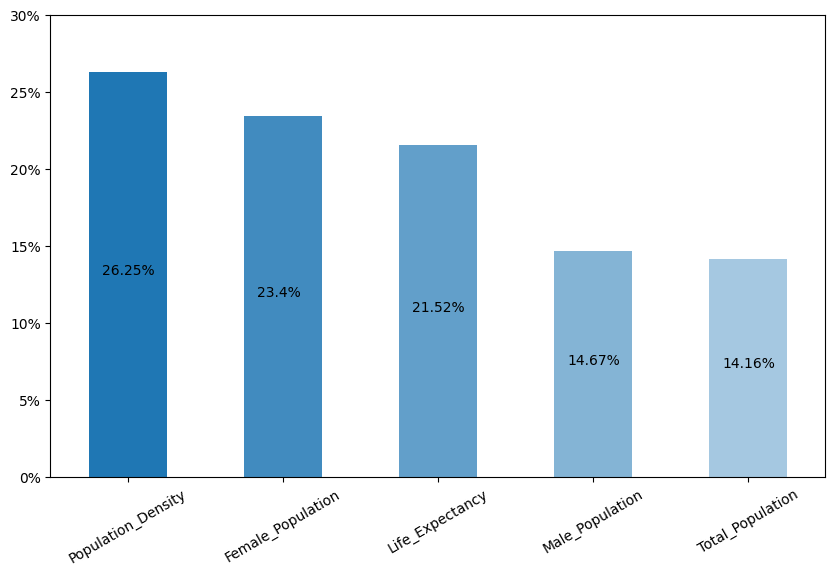

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
ft_imp_barvalues.plot(kind='bar')
ax.set_facecolor("white")
ax.set_ylim(0, 30)
# ax.set_yticklabels()
yticklabels = []
for item in ax.get_yticklabels():
  yticklabels.append(f'{item.get_text()}%')
ax.set_yticklabels(yticklabels)
ax.set_xticklabels(labels=feature_importances.index, rotation=30)
alpha = 1
for bar in ax.patches:
  x = bar.get_x() + bar.get_width()/6
  y = bar.get_height() /2
  value = f'{bar.get_height()}%'
  ax.text(x, y, value)
  bar.set_alpha(alpha)
  alpha = alpha - 0.15
plt.show()

**Conclusión:**

Según nuestro análisis de importancia, la densidad de la población destaca como más influyente, seguida de la población femenina con un 25% y 24% respectivamente.
Esto sugiere que densidad de la población y el número de la población femenina son características relevantes en la incidencia de la letalidad de un país cuando evaluamos el covid-19.